# Laboratorio 1 - Parte 2. Regresión logística



In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/Intro_ML_2025/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
replicating Labs resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.02", varname="student");

In [2]:
#configuración del laboratorio
# Ejecuta esta celda!
from Labs.commons.utils.lab1 import *
_, x, y = part_2()
y = y.reshape(np.size(y), 1)

cargando librerias y variables al ambiente


## Ejercicio 1: Contextualización del problema

En esta sesión de laboratorio, vamos a resolver un problema de clasificación. Los variables que vamos a usar ya se encuentran cargadas:



In [3]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos, muestra \n",x[range(10), :] )
print("")
print(" muestra de etiquetas a predecir \n", y[range(10)])

conjunto de datos, muestra 
 [[ 3.92606402 -6.83699086]
 [ 7.43382787 -3.7485991 ]
 [ 6.20553473  4.77182668]
 [ 6.77983287 -3.07765299]
 [-5.92614125 -4.87588843]
 [ 7.49283136  3.9516693 ]
 [-1.65572633  6.86081477]
 [-8.14881988 -1.85421149]
 [ 8.12616581 -1.66701921]
 [ 9.73411311 -1.63724335]]

 muestra de etiquetas a predecir 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [4]:
#Ejercicio de Codigo
def clases_muestras_carac(X, Y):
    """Esta función debe retornar el numero clases, muestras
        y caracteristicas del conjunto de datos X y Y

        X: matriz numpy con el conjunto de datos para entrenamiento
        Y: matriz numpy con el conjunto de etiquetas
        retorna:
            número de clases (int/float)
            número de muestras (int/float)
            número de características (int/float)
    """
    ##Pista: es de utilidad el metodo np.unique ?
    N,nf =  X.shape[0], X.shape[1]
    clases = len(np.unique(Y))

    return (clases,N,nf)

In [7]:
clases_muestras_carac(x, y)

(2, 500, 2)

**Registra tu solución en línea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T1');

En los problemas de clasificación, que lo permiten, es de utilidad visualizar los datos. De esta manera se puede determinar que modelos o algortimos pueden tener mejor rendimiento. En la siguiente función, se debe:
1. Graficar los datos usando la función [scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) de matplotlib. [Recuerda consultar la documentación de la función](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
2. Asignar un color Map diferente al de defecto. [Aca pueder los valores posibles](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [5]:
#Ejercicio de Codigo
import matplotlib.pyplot as plt
def scatter_plot(X, Y):
    """Esta función es encargada de graficar los datos usando un scatter plot
       (problema de clasificacion).

        X: numpy array con el conjunto de datos para entrenamiento.
           Ésta deberá ser usada para los ejes del gráfico. Puede asumir
           que solo va tener dos columnas
        Y: matriz numpy con el conjunto de etiquetas. Debera se usada
           para mostrar en diferentes colores, las etiquetas de cada una
           de las muestras
        retorna:
            No retorna nada, sólo se debe generar el grafico
    """
    ## puedes acceder con plt a la funcion adecuacada
    ## Pista: recuerda como indexar matrices
    ## Consulta como pasar el Color Map
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.viridis, edgecolor='k')
    # para mostrar el grafico
    plt.show()

    return (None)

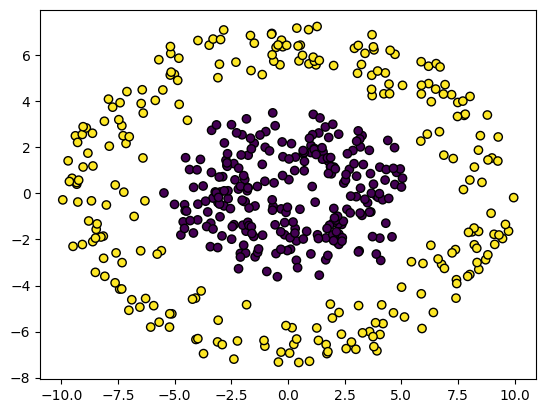

In [6]:
# usarla para ver el grafico
# se debe ver dos nubes de puntos diferenciadas
scatter_plot(x,y)

In [9]:
#Pregunta Abierta
#¿Es el problema linealmente separable? justifique su respuesta
respuesta = "No"

## Ejercicio 2: entrenamiento

En este laboratorio se va a realizar un procedimiento análogo al laboratorio anterior, pero con el modelo de *regresión logística* que sirve para resolver problemas de clasificación (en principio biclase).

¿Cómo se relacionan los siguientes conceptos a la luz del modelo de regresión logística?

1. Función de activación
2. Extensión de matriz
2. Modelo de regresión logística
3. Potencia del polinomio
4. El cálculo del error en clasificación
5. El gradiente descendente

Vamos a completar la función del sigmoide:

In [10]:
#Ejercicio de Código
def sigmoidal(z):
    """Función de activación Sigmoidal

    z: es la varible a la que se le va a aplicar la función sigmoide.
       es un array numpy de una sola dimension
    retorna: un vector con el valor de la función sigmoide aplicada a cada elemento del arreglo de entrada

    """
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    s = 1 / (1 + np.exp(-z))

    return s

En la siguiente celda se sugiere la implementación de 3 métodos que nos ayudaran a implementar los otros conceptos.

1. Modelo de regresión logística(Esta función usa nuestra `sigmoidal`)
2. Extensión de matriz
2. Potencia del polinomio
4. Cálculo del error en clasificación

Debemos comprender que hacen estas funciones para determinar donde poder usarlas mas adelante. Luego de ellos, ejecuta la celda para cargarlas.

In [14]:
def logistic_regression(X, W):
    """calcula la regresión logística
    X: los valores que corresponden a las características
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado por la regresion logística
    """
    #Con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Yest = np.dot(X,W)
    Y_lest = sigmoidal(Yest)

    return Y_lest    #Y estimado: Esta variable contiene la salida de sigm(f(X,W))

def extension_matriz(X):
    """función que realiza la extensión de la matriz X
    X: matriz con en el conjunto de muestras. array: [muestras x características]
    retorna: X_ext: matriz extendida con un vector de unos
    """
    #Obtenemos las dimensiones antes de exteneder la matriz
    muestras,caracterisitcas =X.shape
    #Extendemos la matriz X
    unos = np.array([np.ones(muestras)])
    X_ext = np.concatenate((unos.T, X), axis=1)
    X_ext = X_ext.reshape(muestras, caracterisitcas+1)
    return (X_ext)


def potenciaPolinomio(X,grado):
    """Añade las variables asociadas a un polinomio de grado > 1
    X: matriz con en el conjunto de muestras (sin extender). array: [muestras x características]
    grado: es el grado del polinomio que se va a usar como modelo
    retorna: la matriz de datos con las nuevas características creadas.
    """
    X2 = X.copy()

    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)

    return X2

def cost_logistic(Y_lest, Y):
    """cálculo de la función de coste (entropía-cruzada)
       Si es diferente el Y_estimado con el Y_real cuenta como un error
       Y_lest: numpy array con los valores reales estimados
       Y:  numpy array con los valores reales de las etiquetas
       retorna: costo -- numpy array
    """
    Y_lest = Y_lest.reshape(-1,1)
    Y = Y.reshape(-1,1)
    f1 = Y*np.log(Y_lest + np.finfo(np.float32).eps)
    f2 = (1-Y)*np.log(1-Y_lest + np.finfo(np.float32).eps)
    error = -np.sum(f1+f2)/Y.shape[0]
    return error

In [15]:
# ten en cuenta la salida de esta prueba para responder la pregunta abierta siguiente
vector = np.array([[1,4]])
print(vector)
potenciaPolinomio(vector, 3)

[[1 4]]


array([[ 1,  4,  1, 16,  1, 64]])

In [17]:
#Pregunta Abierta
#Analizando lo anterior y asumiendo que el vector es representado como [x1, x2] ¿Cual seria la representación de `potenciaPolinomio(vector, 3)?
respuesta = "[x1, x2, x1^2, x2^2, x1^3, x2^3] y el modelo z=θ0​+θ1​x1​+θ2​x2​+θ3​x12​+θ4​x22​+θ5​x13​+θ6​x23​"

recordando lo aprendido anteriormente, dividimos nuestro cojunto de datos y normalizamos.
**SOLO EJECUTAR UNA VEZ**

In [18]:
#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
N = x.shape[0]
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]

# normalizamos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de **gradiente_descedente**


$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$

recordar que aca queremos reducir el costo logistico, pero la actualización de los pesos sigue siendo equivalente a la regresión vista anteriormente, solo que agregando la función $g$ que corresponde al sigmoide.

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial J({\bf{w}})}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N}\left( g(f({\bf{x}}_i,{\bf{w}})) - t_i\right)x_{ij}$$

Debemos tener presente:
- Usar las funciones ya implementadas y no usar **ninguna otra libreria** adicional a las librerias ya pre-cargadas como numpy.
- Dentro de nuestra función **vamos incluir una transformación polinómica**, por lo tanto el proceso a implementar puede ser descrito en los siguientes pasos:
    - Aplicar la transformación polinómica
    - Extender la matriz
    - Inicializar $w$
    - Y por cada iteración realizar el cálculo para actualizar $w$

In [19]:
#ejercicio de codigo
def gradiente_descendente_logistic_poly(X,Y,grado,eta, iteraciones):
    """Gradiente descendente para regresión logística
    X: Matriz de datos extendida
    Y: Vector con los valores a predecir
    grado: Grado para usar en la transformacion polinómica
    eta: Taza de aprendizaje
    iteraciones: número máximo de iteraciones

    retorna: W el valor de de los parametros de regresión polinomica
    """
    # aplicamos la transformación
    X2 = potenciaPolinomio(X,grado)

    # realizamos la extensión
    X2_ext = extension_matriz(X2)

    #Tomamos el número de variables del problema leugo de la transformacion
    d = X2_ext.shape[1]
    #Tomamos el número de muestras de la base de datos
    N = X2_ext.shape[0]
    #Inicializamos w
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)
    costos = np.zeros(iteraciones)

    for iter in range(iteraciones):

        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas: W, X2, Y

        Y_est = logistic_regression(X2_ext,W)
        costo = cost_logistic(Y_est, Y)
        W = W - eta * (1/N) * np.dot(X2_ext.T, (Y_est - Y.reshape(N,1)))
        #adicionamos el costo por cada iteracion
        costos[iter] = costo


    print("costo despues de finalizar las iteraciones", costo)
    return W, costos

**Registra tu solución en línea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T2');

Veamos de manera preliminar, si nuestro algortimo de gradiente esta optimizando el costo.
Vamos entrenar con 100 iteraciones y vamos a graficar el costo logistico y verificar como cambia de acuerdo a las iteraciones.
¿Que pasa si cambias el grado?

In [ ]:
iteraciones = 100
w, costos_logistico = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 1, eta = 0.1, iteraciones = iteraciones)
print("este las dimensiones de w son:", w.shape)
plt.plot(range(iteraciones), costos_logistico)
plt.show()

In [ ]:
#Pregunta Abierta
#¿Con base a los resultados anteriores, qué efecto tiene el grado en el comportamiento del costo?
respuesta = ""

Como habiamos visto antes, el costo es nuestra medida de optimización, pero al final debemos evaluar qué tan bien esta realizando la tarea de clasificación. En este caso, a diferencia de la regresión, la métrica de evaluación y la función de coste son diferentes. Entiende la siguiente función, preste especial atención al bloque `if-else`.

In [ ]:
def evaluar_modelo (W, X_to_test, Y_True, grado):
    """ función que evalua un modelo de clasificación

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en la evaluación del modelo
    Y_True: valores reales para usar en la evaluación del modelo
    grado: valor del polinomio a usar

    retorna: el error de clasificación.
    """
    X2 = potenciaPolinomio(X_to_test,grado)
    # realizamos la extensión
    X2_ext = extension_matriz(X2)
    Y_EST = logistic_regression(X2_ext,W)
    #Se asignan los valores a 1 o 0 según el modelo de regresión logística definido
    for pos, tag in enumerate (Y_EST):

        if tag >= 0.5:
            Y_EST[pos] = 1
        else:
            Y_EST[pos] = 0

    error = 0

    for ye, y in zip(Y_EST, Y_True):
        if ye != y:
            error += 1
    error_clasificacion =  error/np.size(Y_True)
    return(error_clasificacion)


Evaluamos el w obtenido antes. Debemos tener presente que para la evaluación usamos el conjunto adecuado para esa tarea. Recuerda usar el grado de acuerdo a la ultima ejecución.

In [ ]:
# recuerda que si entrenaste con grado = 2 debes asignar el mismo valor.
error_test = evaluar_modelo(w, Xtest, Ytest, grado = 1)
print("error en el conjunto de pruebas", error_test)

## Ejercicio 3: Validación

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 30. Para ello completa la siguiente función. Recuerda usar las funciones anteriores.

In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: matriz con el conjunto de muestras de entrenamiento
    Xtest: matriz con el conjunto de muestras de prueba
    Ytrain: salida objetivo para el conjunto de muestras de entrenamiento
    Ytest: salida objetivo para el conjunto de muestras de prueba
    tasas: Es una lista con los valores númericos de tasas de aprendizaje
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados
        para realizar los experimentos
    retorna: un dataframe con los resultados de los experimentos
    """
    numero_iter = 30

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:
            # ignorar el costo
            W, _ =
            error_entrenamiento =
            error_prueba =
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'error_entreamiento'] = error_entrenamiento
            resultados.loc[idx,'error_prueba'] = error_prueba
            idx = idx+1

    return (resultados)

**Registra tu solución en línea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T3');

In [ ]:
#Usa la función experimentar para ver los resultados que se obtienen en el problema de clasificación planteado en el laboratorio
tasas = [10.0, 1.0, 0.1, 0.001]
grados = [1,2,3]
resultados = experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados)

In [ ]:
# para ver los resultados
resultados

In [ ]:
#Pregunta Abierta
#¿con base en los resultados anteriores, qué efecto tiene la  tasa de aprendizaje en los errores de entrenamiento y de prueba?
respuesta = ""

Vamos entrenar nuevamente pero solo con los mejores parámetros. Si hay parametros empatados, el modelo que tenga menos parámetros deberia ser el mejor (recuerda que cuando aumentamos el grado del polinomio aumentamos el número de parametros del modelo).

In [ ]:
# puede usar el siguiente código para ordenar los resultados y ver los 3 primeros
# resultados, use esta salida, para ver cuáles fueron los mejores parámetros
resultados.sort_values(by = ['error_prueba', 'grado'], ascending = True).head(3)

In [ ]:
#Pregunta Abierta
#¿por qué se uso el error de prueba para ordenar la tabla de resultados en lugar del error de entrenamiento?
respuesta = ""

Entrenemos con los mejores parámetros

In [ ]:
# ignoramos el costo!
W,_= gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado =  ,eta =  , iteraciones = 20)
print("estos son los pesos para el modelo entrenando \n", W)

Debemos recordar que el modelo creado se puede resumir en una ecuación usando los pesos de $w$. En el  siguiente ejemplo la ecuación estaria dada como: 2.0 + 3.0*x1 + 4.0*x2, para el caso del polinomio grado 1.

![vectorization](https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/images/frontera_logistic.jpg)


Usando los valores del ultimo $\bf{w}$ entrenado podriamos construir la función que define nuestra frontera.


In [ ]:
#Pregunta Abierta
#Escriba el modelo completo con sus variables y coeficientes de f(**x**,**w**) con la mejor frontera de decisión que encontró. Recuerde tener presente el grado del polinomio.
respuesta = "0.0x1..."